In [1]:
keyword = '纽约大学'

weibo_search

In [2]:
# coding: utf-8

import re
import json
import requests

# 基于 m.weibo.cn 抓取少量数据，无需登陆验证
url_template = "https://m.weibo.cn/api/container/getIndex?type=wb&queryVal={}&containerid=100103type=2%26q%3D{}&page={}"


def clean_text(text):
    """清除文本中的标签等信息"""
    dr = re.compile(r'(<)[^>]+>', re.S)
    dd = dr.sub('', text)
    dr = re.compile(r'#[^#]+#', re.S)
    dd = dr.sub('', dd)
    dr = re.compile(r'@[^ ]+ ', re.S)
    dd = dr.sub('', dd)
    return dd.strip()


def fetch_data(query_val, page_id):
    """抓取关键词某一页的数据"""
    resp = requests.get(url_template.format(query_val, query_val, page_id))
    card_group = json.loads(resp.text)['data']['cards'][0]['card_group']
    print('url：', resp.url, ' --- 条数:', len(card_group))

    mblogs = []  # 保存处理过的微博
    for card in card_group:
        mblog = card['mblog']
        blog = {'mid': mblog['id'],  # 微博id
                'text': clean_text(mblog['text']),  # 文本
                'userid': str(mblog['user']['id']),  # 用户id
                'username': mblog['user']['screen_name'],  # 用户名
                'reposts_count': mblog['reposts_count'],  # 转发
                'comments_count': mblog['comments_count'],  # 评论
                'attitudes_count': mblog['attitudes_count']  # 点赞
                }
        mblogs.append(blog)
    return mblogs


def remove_duplication(mblogs):
    """根据微博的id对微博进行去重"""
    mid_set = {mblogs[0]['mid']}
    new_blogs = []
    for blog in mblogs[1:]:
        if blog['mid'] not in mid_set:
            new_blogs.append(blog)
            mid_set.add(blog['mid'])
    return new_blogs


def fetch_pages(query_val, page_num):
    """抓取关键词多页的数据"""
    mblogs = []
    for page_id in range(1 + page_num + 1):
        try:
            mblogs.extend(fetch_data(query_val, page_id))
        except Exception as e:
            print(e)

    print("去重前：", len(mblogs))
    mblogs = remove_duplication(mblogs)
    print("去重后：", len(mblogs))

    # 保存到 result.json 文件中
    fp = open('result_{}.json'.format(query_val), 'w', encoding='utf-8')
    json.dump(mblogs, fp, ensure_ascii=False, indent=4)
    print("已保存至 result_{}.json".format(query_val))


if __name__ == '__main__':
    fetch_pages(keyword, 50)

url： https://m.weibo.cn/api/container/getIndex?type=wb&queryVal=%E7%BA%BD%E7%BA%A6%E5%A4%A7%E5%AD%A6&containerid=100103type=2%26q%3D%E7%BA%BD%E7%BA%A6%E5%A4%A7%E5%AD%A6&page=0  --- 条数: 10
url： https://m.weibo.cn/api/container/getIndex?type=wb&queryVal=%E7%BA%BD%E7%BA%A6%E5%A4%A7%E5%AD%A6&containerid=100103type=2%26q%3D%E7%BA%BD%E7%BA%A6%E5%A4%A7%E5%AD%A6&page=1  --- 条数: 10
url： https://m.weibo.cn/api/container/getIndex?type=wb&queryVal=%E7%BA%BD%E7%BA%A6%E5%A4%A7%E5%AD%A6&containerid=100103type=2%26q%3D%E7%BA%BD%E7%BA%A6%E5%A4%A7%E5%AD%A6&page=2  --- 条数: 8
url： https://m.weibo.cn/api/container/getIndex?type=wb&queryVal=%E7%BA%BD%E7%BA%A6%E5%A4%A7%E5%AD%A6&containerid=100103type=2%26q%3D%E7%BA%BD%E7%BA%A6%E5%A4%A7%E5%AD%A6&page=3  --- 条数: 10
url： https://m.weibo.cn/api/container/getIndex?type=wb&queryVal=%E7%BA%BD%E7%BA%A6%E5%A4%A7%E5%AD%A6&containerid=100103type=2%26q%3D%E7%BA%BD%E7%BA%A6%E5%A4%A7%E5%AD%A6&page=4  --- 条数: 10
url： https://m.weibo.cn/api/container/getIndex?type=wb&queryV

weibo_cloud

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\CHUANY~1\AppData\Local\Temp\jieba.cache


微博总数： 437


Loading model cost 1.007 seconds.
Prefix dict has been built successfully.


总词数： 6858
[('纽约大学', 318), ('...', 141), ('全文', 75), ('微博', 69), ('视频', 65), ('NYU', 54), ('室友', 42), ('演讲', 41), ('刘彰', 40), ('录取', 33)]


c:\Users\ChuanyangJin\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:1001: UserWarning: mask image should be unsigned byte between 0 and 255. Got a float array
  warnings.warn("mask image should be unsigned byte between 0"


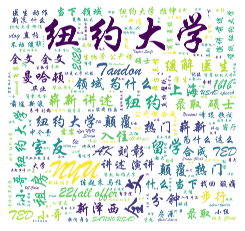

In [3]:
# coding: utf-8

import json

import jieba.analyse
import matplotlib as mpl
# from scipy.misc import imread    # requires scipy 1.1.0
from matplotlib.pyplot import imread
from wordcloud import WordCloud

# mpl.use('TkAgg')
import matplotlib.pyplot as plt

import random
from collections import Counter


def keywords(mblogs):
    text = []
    for blog in mblogs:
        keyword = jieba.analyse.extract_tags(blog['text'])
        text.extend(keyword)
    return text

def gen_img(texts, img_file, add_my_texts = False):
    if add_my_texts:
        texts += mytexts
        random.shuffle(texts)
    
    for text in texts:
        if text in ["网页", "链接", "微博", "视频"]:
            texts.remove(text)

    data = ' '.join(text for text in texts)
    image_coloring = imread(img_file)
    wc = WordCloud(
        background_color='white',
        mask=image_coloring,
        # font_path='/Library/Fonts/STHeiti Light.ttc'
        # font_path='C:\Windows\Fonts\simsun.ttc'
        font_path='C:\Windows\Fonts\STXINGKA.TTF',
        prefer_horizontal = 0.9,
        scale = 15
    )
    wc.generate(data)


    plt.figure()
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

    # wc.to_file(img_file.split('.')[0] + '_wc.png')
    if not add_my_texts:
        wc.to_file(keyword+'.png')
    else:
        wc.to_file(keyword+'_new.png')


if __name__ == '__main__':
    keyword = keyword
    mblogs = json.loads(open('result_{}.json'.format(keyword), 'r', encoding='utf-8').read())
    print('微博总数：', len(mblogs))

    words = []
    for blog in mblogs:
        words.extend(jieba.analyse.extract_tags(blog['text']))

    print("总词数：", len(words))

    c = Counter(words)
    print(c.most_common(10))

    gen_img(words, 'edge.png', add_my_texts = False)
    